<a href="https://colab.research.google.com/github/RenanYMartins/ADD-Trabalho1/blob/main/Analise_Vendas_Automotivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Avaliativa I - Análise de Dados do Mercado Imobiliário de Nova York

## Setup Inicial

Importando bibliotecas e conectando à base de dados.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Análise de Dados/Trabalho I/data/07_mercado_imobiliário_ny.csv')

## Visão Inicial dos Dados

In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


Vemos que os dados representam imóveis à venda disponíveis em Nova Iorque, com as seguintes propriedades:

- `BROKERTITLE`: Título do corretor.
- `TYPE`: Tipo do imóvel.
- `PRICE`: Preço do imóvel.
- `BEDS`: Número de quartos.
- `BATH`: Número de banheiros.
- `PROPERTYSQFT`: Área em $\mathrm{m}^2$.
- `ADDRESS`: Endereço completo.
- `STATE`: Estado (NY).
- `MAIN_ADDRESS`: Endereço principal.
- `ADMINISTRATIVE_AREA_LEVEL_2`: Área administrativa secundária.
- `LOCALITY`: Localidade.
- `SUBLOCALITY`: Sublocalidade.
- `STREET_NAME`: Nome da rua.
- `LONG_NAME`: Nome completo da localização.
- `FORMATTED_ADDRESS`: Endereço formatado.
- `LATITUDE`: Latitude geográfica.
- `LONGITUDE`: Longitude geográfica.

In [ ]:
print(f'A base contém {df.shape[0]} registros e {df.shape[1]} variáveis.')

A base contém 4801 registros e 17 variáveis.


In [ ]:
df.isnull().sum().reset_index().rename(columns={0: "Quantidade de Nulos", "index": "Variável"})

,Variável,Quantidade de Nulos
0,BROKERTITLE,0
1,TYPE,0
2,PRICE,0
3,BEDS,0
4,BATH,0
5,PROPERTYSQFT,0
6,ADDRESS,0
7,STATE,0
8,MAIN_ADDRESS,0
9,ADMINISTRATIVE_AREA_LEVEL_2,0


In [ ]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## Endereço com 0 banheiros? Vejamos!

In [ ]:
df.loc[df['BATH']==0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
2699,Brokered by COMPASS,Pending,675000,3,0.0,2780.000000,41 Warren St Unit Subc,"Manhattan, NY 10007","41 Warren St Unit SubcManhattan, NY 10007",New York,New York County,New York,Manhattan,41,"41 Warren St b, New York, NY 10007, USA",40.714393,-74.008877
2704,Brokered by COMPASS,Pending,675000,3,0.0,2780.000000,41 Warren St Unit Subc,"Manhattan, NY 10007","41 Warren St Unit SubcManhattan, NY 10007",New York,New York County,New York,Manhattan,41,"41 Warren St b, New York, NY 10007, USA",40.714393,-74.008877
3379,Brokered by Brown Harris Stevens,Townhouse for sale,14995000,3,0.0,2184.207862,50 W 86th St Unit Townhouse,"Manhattan, NY 10024","50 W 86th St Unit TownhouseManhattan, NY 10024",United States,New York,New York County,New York,West 86th Street,"50 W 86th St, New York, NY 10024, USA",40.786046,-73.971834


Os _ids_ `2699` e `2704` parecem duplicados. São mesmo?

In [ ]:
df.iloc[2699].equals(df.iloc[2704])

True

Sim! Esses dados estão duplicados! Será que existem mais?

In [ ]:
df[df.duplicated(keep=False)]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
80,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
113,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
114,Brokered by Sowae Corp,Multi-family home for sale,346000,5,2.000000,2184.207862,103-12 104th St,"Ozone Park, NY 11417","103-12 104th StOzone Park, NY 11417",United States,New York,Queens County,Queens,104th Street,"103-12 104th St, Jamaica, NY 11417, USA",40.683789,-73.838104
115,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714
4770,Brokered by Sotheby's International Realty - E...,Condo for sale,2600000,3,2.000000,1729.000000,242 E 15th St Apt 1,"New York, NY 10003","242 E 15th St Apt 1New York, NY 10003",New York,New York County,New York,Manhattan,242,"242 E 15th St APT 1, New York, NY 10003, USA",40.733031,-73.985037
4775,Brokered by EXIT REALTY PREMIER,House for sale,749000,3,2.373861,2002.000000,631 Essex St,"Brooklyn, NY 11208","631 Essex StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Essex Street,"631 Essex St, Brooklyn, NY 11208, USA",40.668173,-73.880027
4780,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714


Vamos remover os dados duplicados, mantendo apenas uma instância de cada um deles.

In [ ]:
df_filtered = df.drop_duplicates()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

In [ ]:
df_filtered.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.587000e+03,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000
mean,2.381172e+06,3.365816,2.377735,2177.712426,40.713932,-73.941584
std,3.206831e+07,2.628808,1.968503,2283.095559,0.087738,0.101276
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.638588,-73.987420
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726667,-73.949116
75%,1.498500e+06,4.000000,3.000000,2184.207862,40.771913,-73.869455
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


## Visualizações

### Histogramas

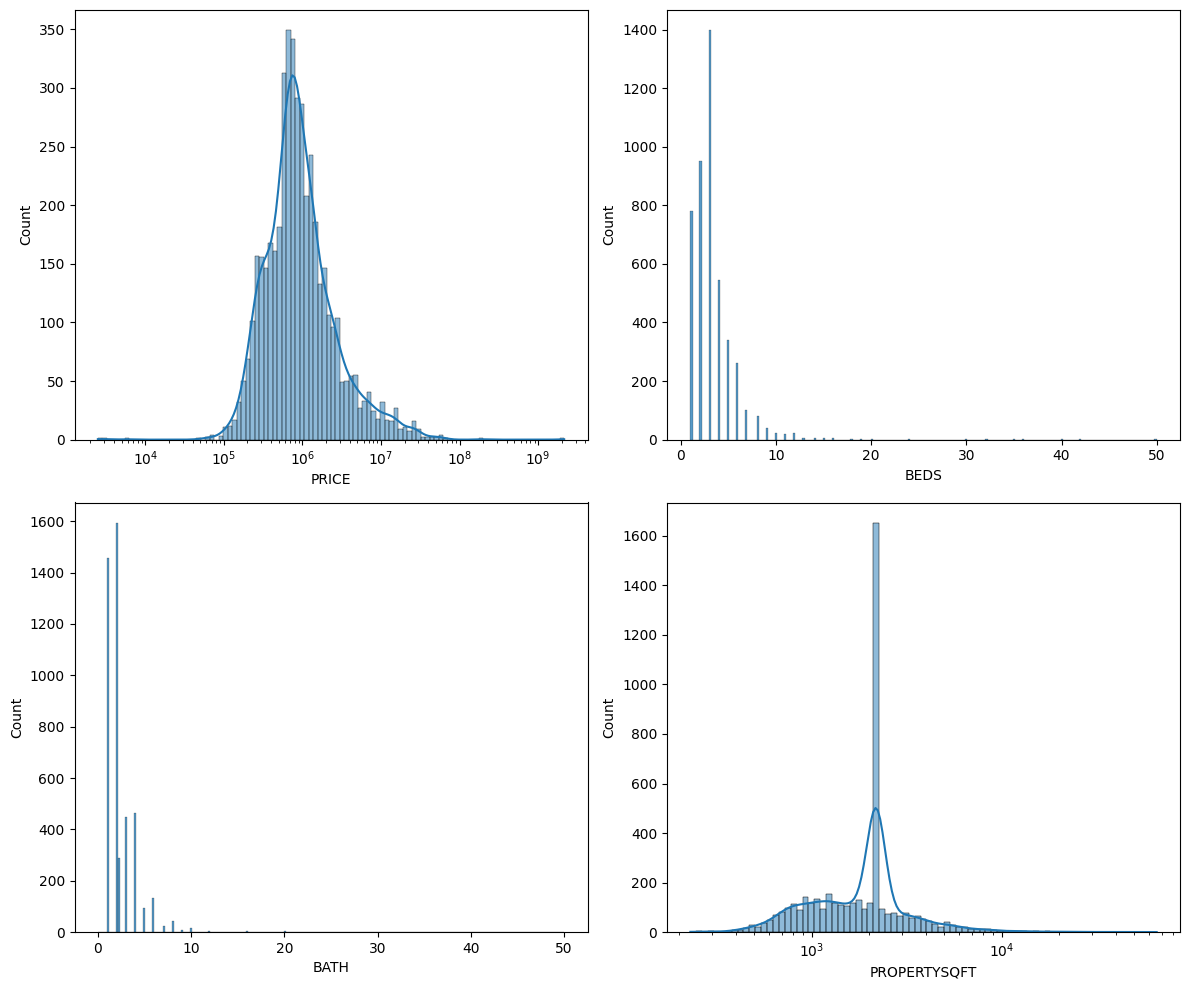

In [ ]:
cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axs_flat = axs.flatten()

for idx, col in enumerate(cols):
    sns.histplot(
        data=df_filtered[col],
        ax=axs_flat[idx],
        log_scale=True if col == 'PRICE' or col == 'PROPERTYSQFT' else False,
        kde=True if col == 'PRICE' or col == 'PROPERTYSQFT' else False
    )

plt.tight_layout()
plt.show()

### Boxplot

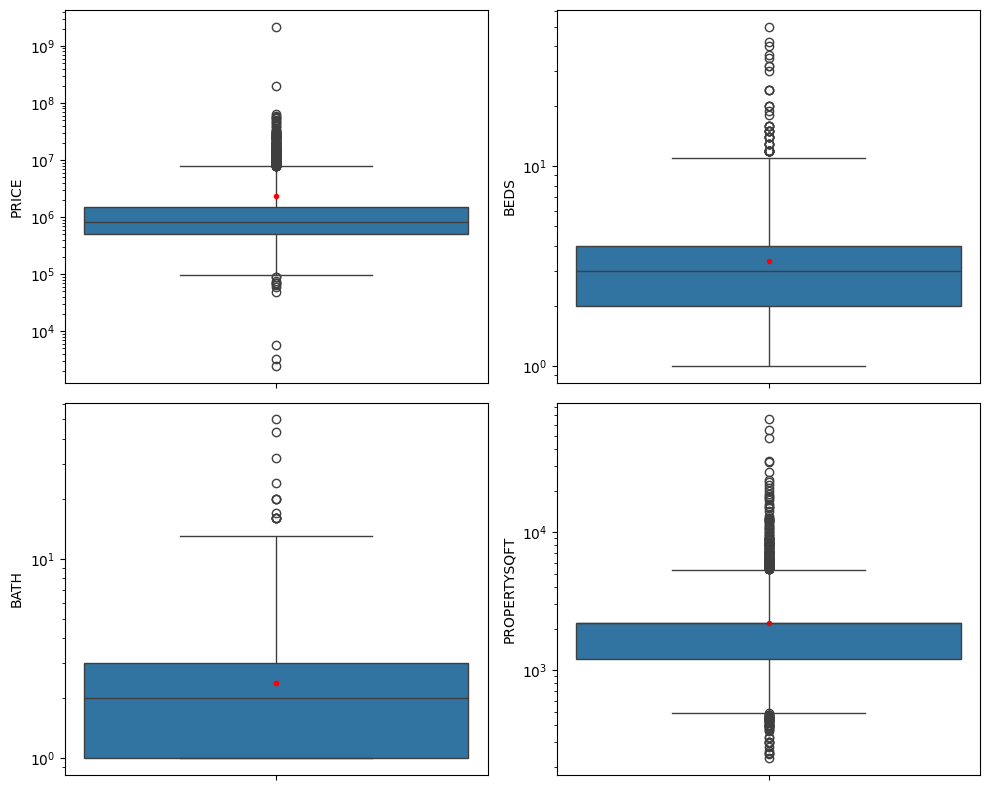

In [ ]:
cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axs_flat = axs.flatten()

for idx, col in enumerate(cols):
    sns.boxplot(
        data=df_filtered[col],
        ax=axs_flat[idx],
        log_scale=True,
    )
    axs_flat[idx].plot(df_filtered[col].mean(), 'r.')

plt.tight_layout()
plt.show()

### Matriz de Correlação

In [ ]:
corr = df_filtered.select_dtypes(include='number').corr()

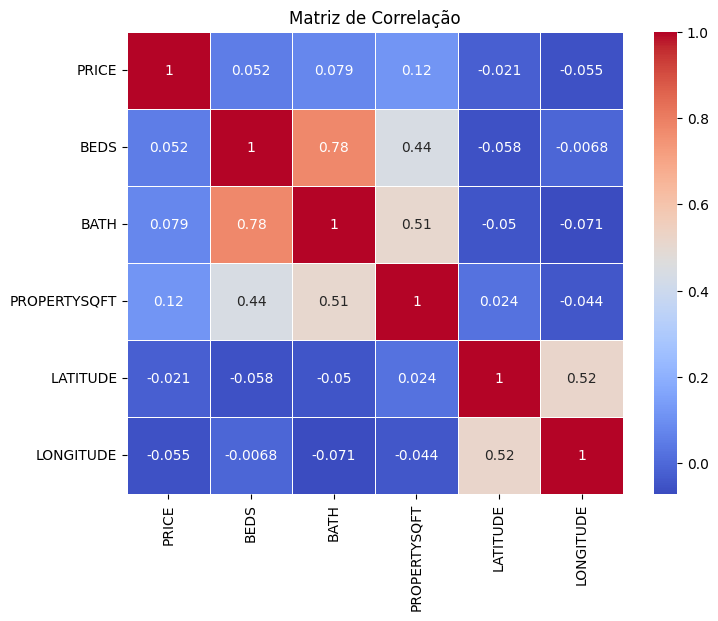

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Matriz de Correlação')
plt.show()

## Análise aprofundada: `PROPERTYSQFT`

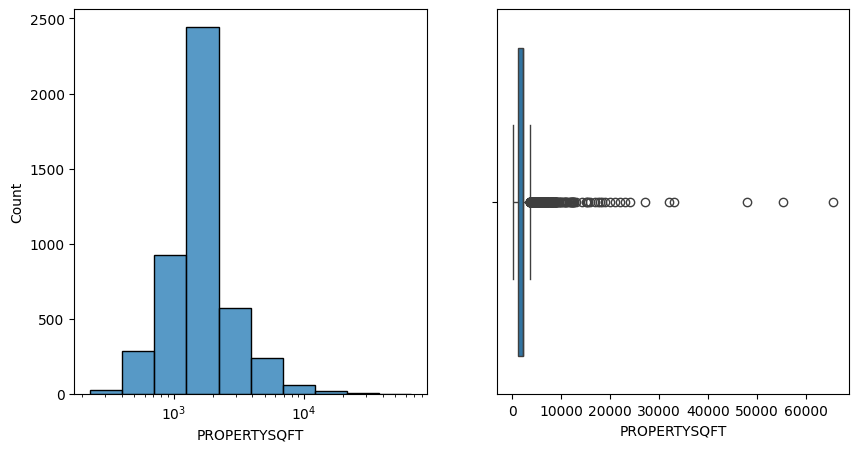

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(df_filtered['PROPERTYSQFT'], ax=axs[0], log_scale=True, bins=10)
sns.boxplot(df_filtered['PROPERTYSQFT'], ax=axs[1], orient='h')

plt.show()

In [ ]:
df_filtered['PROPERTYSQFT'].max()

65535.0

O valor máximo em `PROPERTYSQFT` (65535) é o maior valor possível para um _inteiro de 16 bits sem sinal_. Dessa forma, pode ser um erro.

## Visualização Geográfica

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    df_filtered,
    lat="LATITUDE",
    lon="LONGITUDE",
    color="PRICE",
    size="PROPERTYSQFT",
    hover_data=["PRICE", "BEDS", "BATH"],
    zoom=10,
    height=600
)

fig.update_layout(mapbox_style="open-street-map")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()
